In this Notebook, i will try to check the relation of Measures of Centrality **(Mean,Median,Mode)** for different type of data distribution

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import Counter
from itertools import groupby

## Plot / Helper Functions

In [40]:
def plot_data(dataset,bins):
    plt.hist(dataset,bins = bins,histtype='bar', ec='black')
    plt.show()

In [41]:
def plot_fn(dataset,color,Centrality_Value,Centrality_Type):
    print(Centrality_Type+":",Centrality_Value)
    plt.hist(dataset,bins = bins,histtype='bar', ec='black')
    plt.axvline(x=[Centrality_Value],color=color,linestyle="dashed")
    plt.show()

In [42]:
def plot_Mean_for_DifferentDistributution(dataset):
    Mean = np.mean(dataset)
    plot_fn(dataset,"r",Mean,"Mean")
    return Mean

In [43]:
def plot_Median_for_DifferentDistributution(dataset):
    Median = np.median(dataset)
    plot_fn(dataset,"r",Median,"Median")
    return Median

In [44]:
def plot_Mode_for_DifferentDistributution(dataset):
    Mode = float(stats.mode(dataset)[0])
    plot_fn(dataset,"r",Mode,"Mode")
    return Mode

In [45]:
def plot_MoC(dataset):
    mean = plot_Mean_for_DifferentDistributution(dataset)
    median = plot_Median_for_DifferentDistributution(dataset)
    mode = plot_Mode_for_DifferentDistributution(dataset)   
    return mean,median,mode

In [46]:
def Plot_MeanMedianModeTogether(dataset,Mean,Median,Mode):
    plt.hist(dataset,bins = bins,histtype='bar', ec='black')
    plt.axvline(x=[Mean],color="r",linestyle="dashed")
    plt.axvline(x=[Median],color="g",linestyle="dashed")
    if isinstance(Mode, list):
        for each in Mode:
            plt.axvline(x=[each],color="brown",linestyle="dashed")
    else:
        plt.axvline(x=[Mode],color="brown",linestyle="dashed") 
    plt.legend(["Mean","Median","Mode"])
    plt.show()

In [47]:
def plot_MultipleModes(dataset,Modes):
    print("Modes:",Modes)
    plt.hist(dataset,bins = bins,histtype='bar', ec='black')
    for each in Modes:  
        plt.axvline(x=[each],color="brown",linestyle="dashed")
    plt.show()

## Symetric Distribution

In [48]:
data = [4, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 10]
bins = np.arange(3.5,11.5,1)
bins

array([ 3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5])

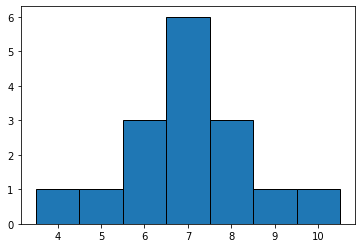

Mean: 7.0


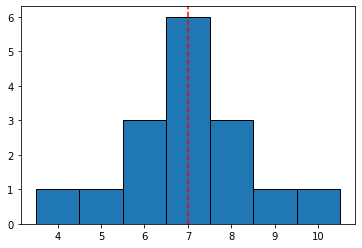

Median: 7.0


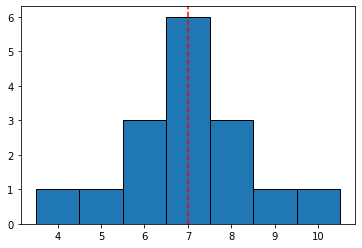

Mode: 7.0


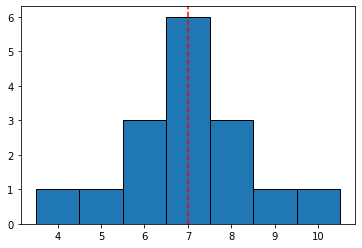

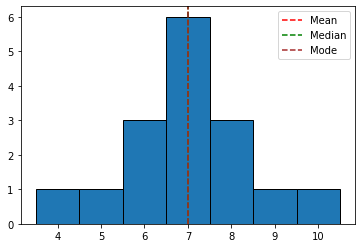

In [49]:
plot_data(data,bins)
mean,median,mode = plot_MoC(data)
Plot_MeanMedianModeTogether(data,mean,median,mode)

So from above it is clear that for a symmetric distribution the following

*Mean = Median = Mode* is always true

## Left Skewed Distribution

In [50]:
lsd_data = [4,5,6,6,7,7,7,8,8,8,9,9,9,9,10,10,10,10,10,10]

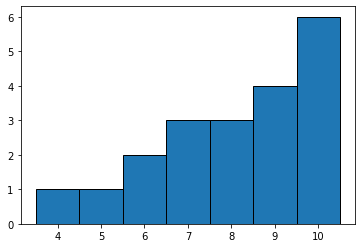

Mean: 8.1


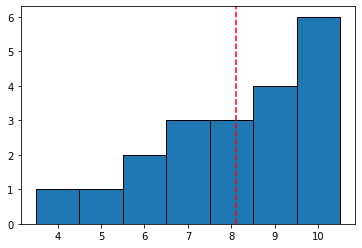

Median: 8.5


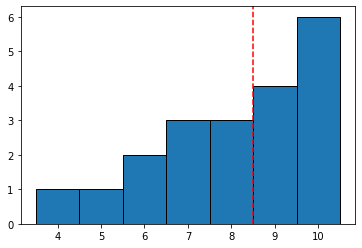

Mode: 10.0


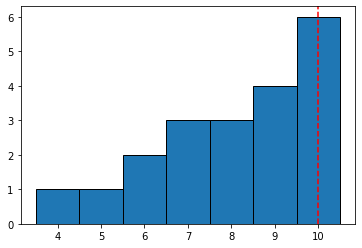

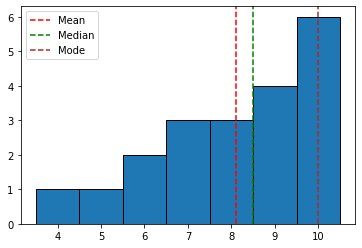

In [51]:
plot_data(lsd_data,bins)
mean,median,mode = plot_MoC(lsd_data)
Plot_MeanMedianModeTogether(lsd_data,mean,median,mode)

The above relation which we can find for Left Skewed Distribution is that:

*Mean < Median < Mode*

However this is always not the case, let me give an example(check below)

In [52]:
# compared to the previous data i have added an aditional value of 8
lsd_data2 = [4,5,6,6,7,7,7,8,8,8,8,9,9,9,9,10,10,10,10,10,10]

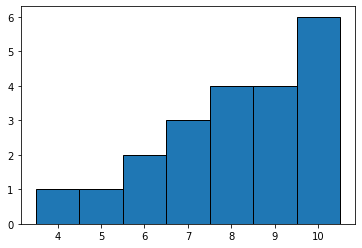

Mean: 8.095238095238095


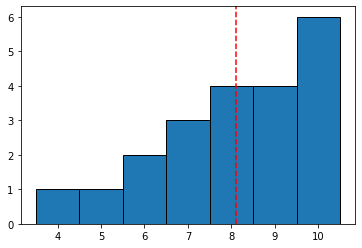

Median: 8.0


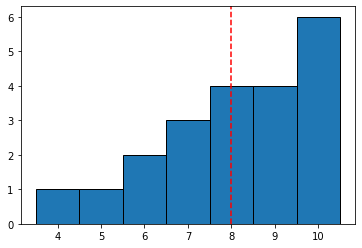

Mode: 10.0


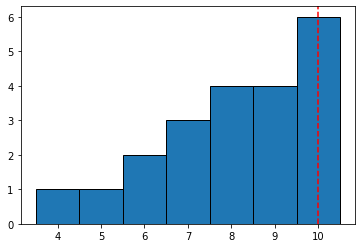

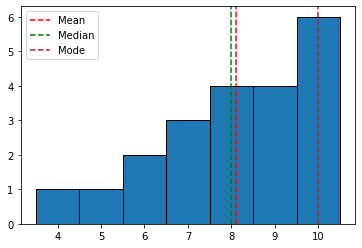

In [53]:
plot_data(lsd_data2,bins)
mean,median,mode = plot_MoC(lsd_data2)
Plot_MeanMedianModeTogether(lsd_data2,mean,median,mode)

Here we can see clearly that:

*Median < Mean < Mode*

So for Left skewed distribution, the order of relation between *Mean, Median and Mode* is not clear.

## Right Skewed Distribution

In [54]:
rsd_data = [4,4,4,4,4,4,5,5,5,5,6,6,6,7,7,7,8,8,9,10]

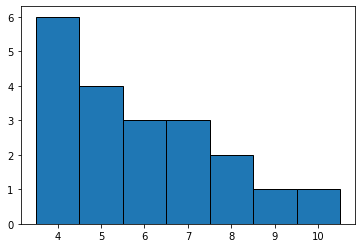

Mean: 5.9


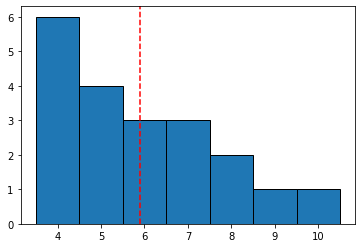

Median: 5.5


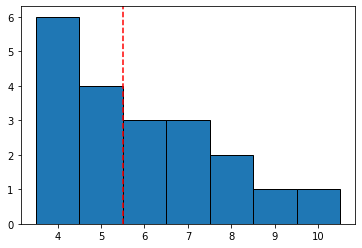

Mode: 4.0


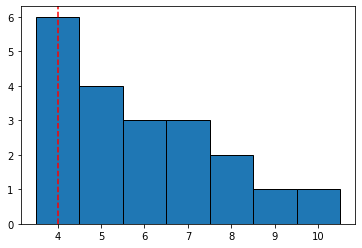

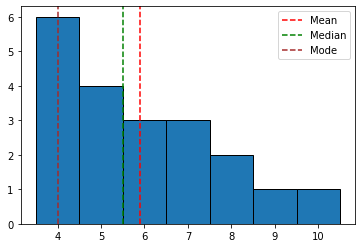

In [55]:
plot_data(rsd_data,bins)
mean,median,mode = plot_MoC(rsd_data)
Plot_MeanMedianModeTogether(rsd_data,mean,median,mode)

Here we can see clearly that:

*Mode < Median < Mean*

In [56]:
# compared to the previous data i have added an aditional value of 6
rsd_data2 = [4,4,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,8,8,9,10]

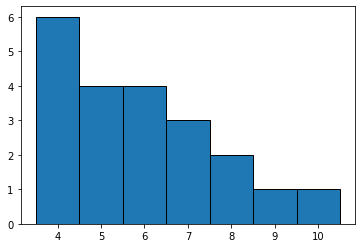

Mean: 5.904761904761905


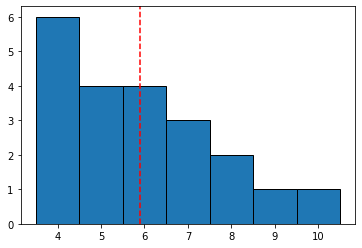

Median: 6.0


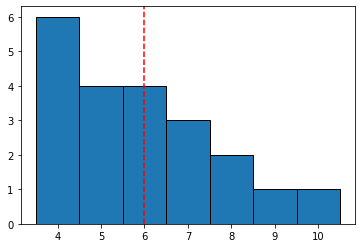

Mode: 4.0


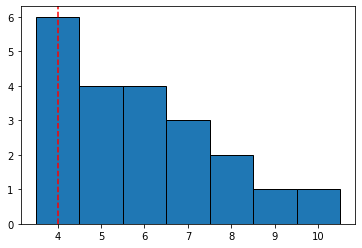

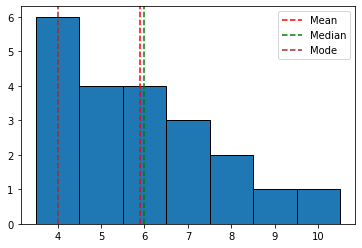

In [57]:
plot_data(rsd_data2,bins)
mean,median,mode = plot_MoC(rsd_data2)
Plot_MeanMedianModeTogether(rsd_data2,mean,median,mode)

Here it is *Mode < Mean < Mode*. So like Left Skewed Distribution, right skewed also has no definite order.

## BiModal Symmetric Distribution

In [58]:
bimodal_data = [4,4,5,5,5,5,5,6,6,6,7,8,8,8,9,9,9,9,9,10,10]

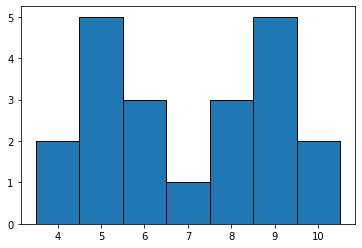

Mean: 7.0


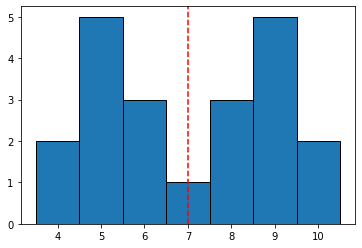

Median: 7.0


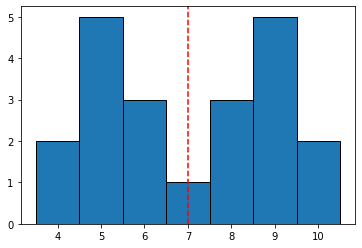

Mode: 5.0


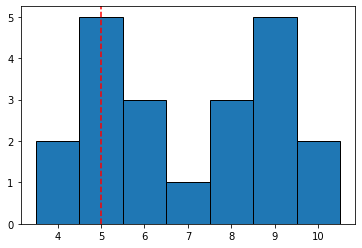

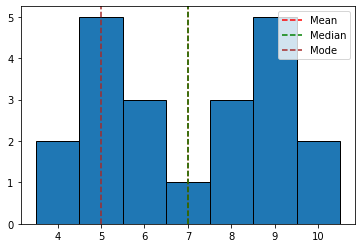

In [59]:
plot_data(bimodal_data,bins)
mean,median,mode = plot_MoC(bimodal_data)
Plot_MeanMedianModeTogether(bimodal_data,mean,median,mode)

Since we use scipy.stats, in case of multiple values having same highest frequency, it takes the minimum number whose frequency is maximum.

Lets try to consider all modes and plot them

In [60]:
# group most_common output by frequency
freqs = groupby(Counter(bimodal_data).most_common(), lambda x:x[1])
# pick off the first group (highest frequency)
Modes = [val for val,count in next(freqs)[1]]

Modes: [5, 9]


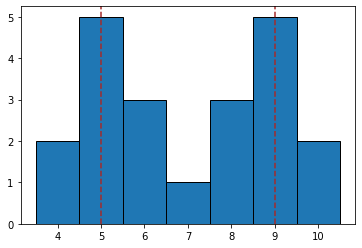

In [61]:
plot_MultipleModes(bimodal_data,Modes)

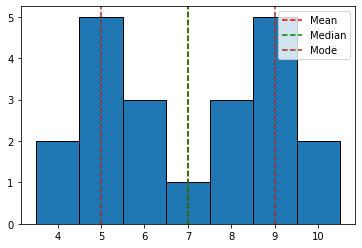

In [62]:
Plot_MeanMedianModeTogether(bimodal_data,mean,median,Modes)